# Método de Volúmenes Finitos - Término Fuente

En el tutorial anterior aprendimos en que consiste el método de volúmenes finitos para la ecuación de difusión en 1D en régimen estacionario. En este tutorial desarrollaremos el mismo ejercicio, pero se añadirá un fuente de generación de calor y se hará una comparación entre el resultado numérico y el resultado analítico.

\begin{equation} \frac{d}{dx} \left( k \frac{dT}{dx} \right) +S = 0 \tag{1} \end{equation}

## Ejercicio

Se tiene un espesor de pared cuyas caras extremas $A$ y $B$ tienen una temperatura de 100 °C y 200 °C respectivamente. Si la longitud del espesor de pared, $L = 2 cm$, la conductividad térmica $k = 0.5 W/m.°K$ y la generación de calor uniforme, $q = 1000 kW/m^3$. Calcular la distribución de temperaturas a lo largo del espesor de pared.

<center> <img src="./imagenes/imagen5.jpg" width="300"/> </center>

## Solución

Al igual que en el caso anterior, debemos generar una malla y discretizar la ecuación de difusión de calor (1). En este caso, la malla será dividida en 5 volúmenes de control, resultado que el tamaño de elemento de malla será $\delta x = 0.004m$

<center> <img src="./imagenes/imagen6.jpg" width="600"/> </center>

### Para los nodos 2, 3 y 4

Para discretizar la ecuación de difusión, primero integramos respecto de los puntos intermedios $w$ y $e$ (minúscula)

\begin{equation} \int_{\Delta V} \frac{d}{dx} \left( k \frac{dT}{dx} \right) dV + \int_{\Delta V}q dV = 0 \tag{2} \end{equation}

\begin{equation} \left[ \left( kA \frac{dT}{dx} \right)_e - \left( kA \frac{dT}{dx} \right)_w \right] + q \Delta V = 0 \tag{3}\end{equation}

\begin{equation} \left[  k_e A \left(\frac{T_E-T_P}{\delta x} \right) -  k_w A \left(\frac{T_P - T_W}{\delta_x} \right) \right] + q A \delta x = 0 \tag{4}\end{equation}

Factorizando las temperaturas, podemos reordenar la ecuación de la siguiente forma:

\begin{equation} \left( \frac{k_e A}{\delta x} + \frac{k_w A}{\delta x}  \right) T_P = \left(\frac{k_w A}{\delta x}\right)T_W +\left(\frac{k_e A}{\delta x}\right)T_E +qA \delta x \tag{5} \end{equation}

Luego, podemos simplificar la ecuación con la siguiente expresión:

\begin{equation} a_P T_P = a_W T_W + a_E T_E + S_u \tag{6} \end{equation}

Para nuestro caso, al tratarse de un solo material el valor de $k_e$ y $k_w$ es el mismo, por lo que podemos tener las siguientes igualdades para la ecuación (5)

|         $a_W$         |         $a_E$         |       $a_P$       | $S_P$ |    $S_u$     |
|:---------------------:|:---------------------:|:-----------------:|:-----:|:------------:|
| $\frac{kA}{\delta x}$ | $\frac{kA}{\delta x}$ | $a_W + a_E - S_P$ |  $0$  | $qA\delta x$ |

La ecuación (6) y la tabla previa son válidos para los nodos 2, 3 y 4. Debido a que en esos nodos se tendría información de los puntos vecinos $E$ y $W$

Para los nodos 1 y 5, la discretización tendría ecuaciones diferentes por encontrase en las fronteras del espesor de pared.

### Para el Nodo 1

Basandonos en la ecuación (2), discretizando los valores correspondientes tendremos que:

\begin{equation} \left[ \left( kA \frac{dT}{dx} \right)_e - \left( kA \frac{dT}{dx/2} \right)_A \right] + q \Delta V = 0 \tag{7}\end{equation}

\begin{equation} \left[  k_e A \left(\frac{T_E-T_P}{\delta x} \right) -  k_A A \left(\frac{T_P - T_A}{\delta_x/2} \right) \right] + q A \delta x = 0 \tag{8}\end{equation}

Como se trata del mismo material los valores de la conductividad térmica son iguales; $k_e = k_A = k$. Además las áreas se mantendrán iguales en todo el espesor de la pared.

Factorizando las temperaturas tendremos la siguiente forma:

\begin{equation} \left( \frac{k}{\delta x}A+ \frac{2k}{\delta x}A \right)T_P = 0.T_W +\left( \frac{k}{\delta x}A \right)T_E + \left( \frac{2k}{\delta x}A \right)T_A +qA\delta x \tag{9} \end{equation}

La ecuación (9) la podemos reemplazar por la ecuación (6), de donde la nueva tabla con los valores para cada coeficiente serán:

| $a_W$ |         $a_E$         |       $a_P$       |       $S_P$       |               $S_u$               |
|:-----:|:---------------------:|:-----------------:|:-----------------:|:---------------------------------:|
|  $0$  | $\frac{kA}{\delta x}$ | $a_W + a_E - S_P$ | $-\frac{2kA}{dx}$ | $qA\delta x + \frac{2kA}{dx} T_A$ |

### Nodo 5

Análogamente, para el nodo 5, podemos escribir la ecuación discretizada como:

\begin{equation} \left( \frac{2k}{\delta x}A+ \frac{k}{\delta x}A \right)T_P = \left( \frac{k}{\delta x}A \right).T_W +0.T_E + \left( \frac{2k}{\delta x}A \right)T_B +qA\delta x \tag{10} \end{equation}

Donde la tabla de los coeficientes será:

|         $a_W$         | $a_E$ |       $a_P$       |       $S_P$       |               $S_u$               |
|:---------------------:|:-----:|:-----------------:|:-----------------:|:---------------------------------:|
| $\frac{kA}{\delta x}$ |  $0$  | $a_W + a_E - S_P$ | $-\frac{2kA}{dx}$ | $qA\delta x + \frac{2kA}{dx} T_B$ |

### Reemplazando Valores para cada nodo

Reemplazado los valores en las tablas anteriores para cada nodo podemos construir la siguiente tabla:

| $Nodo$ | $a_W$ | $a_E$ | $a_P$ | $S_P$  |     $S_u$     |
|:------:|:-----:|:-----:|:-----:|:------:|:-------------:|
|  $1$   |  $0$  | $125$ | $375$ | $-250$ | $4000+250T_A$ |
|  $2$   | $125$ | $125$ | $250$ |  $0$   |    $4000$     |
|  $3$   | $125$ | $125$ | $250$ |  $0$   |    $4000$     |
|  $4$   | $125$ | $125$ | $250$ |  $0$   |    $4000$     |
|  $5$   | $125$ |  $0$  | $375$ | $-250$ | $4000+250T_B$ |

Este sistema de ecuaciones lineales lo podemos resolver usando matrices, quedando de la siguiente forma:

\begin{equation} \begin{bmatrix} 375 & -125 & 0 & 0 & 0 \\ -125 & 250 & -125 & 0 & 0 \\ 0 & -125 & 250 & -125 & 0 \\ 0 & 0 & -125 & 250 & -125 \\ 0 & 0 & 0 & -125 & 375 \end{bmatrix}\begin{bmatrix} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5  \end{bmatrix} = \begin{bmatrix} 1000000x0.004 + 250T_A \\ 4000 \\ 4000 \\ 4000 \\ 1000000x0.004+250T_B \end{bmatrix} \end{equation}

Donde los valores de $T_A$ y $T_B$ son 100 °C y 200 °C respectivamente como indica el enunciado del ejercicio.

Resolviendo esta matriz (por ejemplo mediante la matriz inversa) obtenemos los siguientes resultados:

\begin{equation} \begin{bmatrix} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5 \end{bmatrix} =  \begin{bmatrix} 150 \\ 218 \\ 254 \\ 258 \\ 230 \end{bmatrix}  \end{equation}

### Comparación de la solución analítica vs la solución numérica

La solución analítica o solución exacta para este problema está dada mediante la siguiente ecuación:

\begin{equation} T = \left[ \frac{T_B - T_A}{L} + \frac{q}{2k} \left( L-x \right) \right]x+T_A \tag{11} \end{equation}

Donde x serán las diferentes distancias a lo largo del espesor de la pared:

|          $Nodo$           |   $1$   |   $2$   |   $3$   |   $4$   |   $5$   |
|:-------------------------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|          $x(m)$           | $0.002$ | $0.006$ | $0.010$ | $0.014$ | $0.018$ |
|   $Solución$ $Numérica$   |  $150$  |  $218$  |  $254$  |  $258$  |  $230$  |
|  $Solución$ $Analítica$   |  $146$  |  $214$  |  $250$  |  $254$  |  $226$  |
| $Porcentaje$ $de$ $Error$ | $2.73$  | $1.86$  | $1.60$  | $1.57$  | $1.76$  |

### Resolviendo Ejercicios en Python

Usando como base el código del tutorial anterior, lo hemos adaptado para el presente ejercicio y hacemos una comparación del resultado numérico con el resultado analítico (exacto), con el cual, según podemos observar en la gráfica hay una pequeña diferencia (porcentaje de error) el cual puede deberse al tamaño de elemento de malla, si refinamos esa malla, discretizando correctamente la ecuación de difusión nuevamente, obtendremos un resultados más cercano al real.

[0.    0.001 0.003 0.005 0.007 0.009 0.011 0.013 0.015 0.017 0.019 0.02 ]
[100. 125. 167. 201. 227. 245. 255. 257. 251. 237. 215. 200.]
[100. 124. 166. 200. 226. 244. 254. 256. 250. 236. 214. 200.]


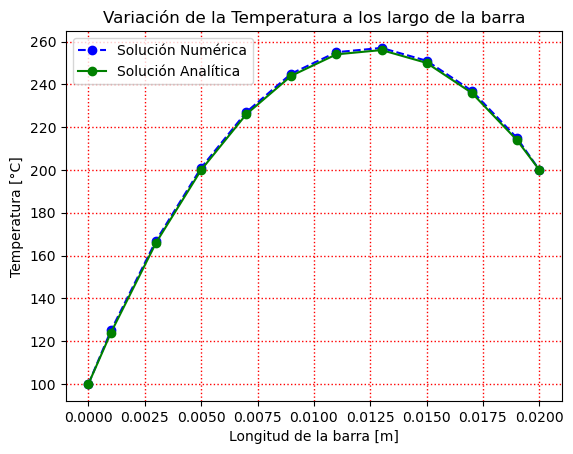

In [6]:
# Resolviendo Ejercicio
import numpy as np
import matplotlib.pyplot as plt
Ta = 100 #Temperatura en el extremo izquierdo [°C]
Tb = 200 #Temperatura en el extremo derecho [°C]
k = 0.5 #Conductividad térmica [W/m°K]
A = 1 #Área seccional de la barra [m2] (tomamos el valor de 1, pues no afectará en el cálculo debido a que se elimina de cada término de la ecuación)
L = 0.02 #Longitud de la barra [m]
n = 10 #Cantidad de elementos
l = L/n #Tamaño del elemento de malla [m]
q = 1000000 #Fuente de calor [W/m3]
# Puntos a calcular en la barra (mallado)
x = np.arange(l/2,L,l) #Creando la malla
x = np.append(x, L) #Agregando valor al final
x = np.insert(x,0,0) #Agregando valor al inicio
print(x)

# SOLUCIÓN NUMÉRICA
#De las ecuaciones obtenidas para los nodos 1, 2, 3, 4 y 5 obtenemos el siguiente sistema de ecuaciones lineales en matrices
## Matriz1 = np.matrix([[375,-125,0,0,0],[-125,250,-125,0,0],[0,-125,250,-125,0],[0,0,-125,250,-125],[0,0,0,-125,375]])
## Matriz2 = np.matrix([[1000000*0.004+250*Ta],[4000],[4000],[4000],[1000000*0.004+250*Tb]])

#Para los nodos intermedios
aw = k*A/l
ae = k*A/l
Sp = 0
ap = aw+ae-Sp
Su = q*A*l
Matriz1 = np.zeros((n,n))
for i in np.arange(1,n):
    Matriz1[i][i-1]=-aw
    Matriz1[i-1][i]=-ae
    Matriz1[i][i]=ap

#Para el nodo inicial
awi = 0
aei = k*A/l
Spi = -2*k*A/l
api = awi+aei-Spi
Sui = q*A*l+2*k*A*Ta/l
Matriz1[0][0] = api

#Para el nodo final
awf = k*A/l
aef = 0
Spf = -2*k*A/l
apf = awi+aei-Spi
Suf = q*A*l+2*k*A*Tb/l
Matriz1[n-1][n-1] = apf

#Construyendo la segunda matriz
Matriz2 = np.zeros((n,1))
for j in np.arange(1,n-1):
    Matriz2[j][0]=Su
    Matriz2[0][0]=Sui
    Matriz2[n-1][0]=Suf

#Resolviendo la matriz
T = np.linalg.inv(Matriz1)
T = np.matmul(T,Matriz2)
T = np.append(T, Tb) #Agregando valor al final
T = np.insert(T,0,Ta) #Agregando valor al inicio
print(T)

# SOLUCIÓN ANALÍTICA
Texacto = ((Tb-Ta)/L+(q*(L-x))/(2*k))*x+Ta
print(Texacto)

#Gráfica
plt.plot(x,T,"ob--")
plt.plot(x,Texacto, "o-", color='green')
plt.title('Variación de la Temperatura a los largo de la barra')
plt.xlabel('Longitud de la barra [m]')
plt.ylabel('Temperatura [°C]')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.legend(['Solución Numérica','Solución Analítica']);
